## Funktionen zum Bearbeiten des Katalogs

In [11]:
from os.path import isfile, join, splitext, isdir,split
from os import listdir, makedirs
from glob import glob
import subprocess

# Specific function for name formated like this:
# catalog/catalogPart/fileFormat/fileName.fileFormat
def simplifyPath(path, fileEnding =None):
    directory, filename = split(path)
    catalogPath, fileFormat = split(directory)
    catalogName, catalogPart = split(catalogPath) 
    root, catalogName = split(catalogName) 
    newPath = join( catalogName,catalogPart + filename)
    if fileEnding:
        newPath = splitext(newPath)[0] + fileEnding
    return newPath
simplifyPath('../SD/SD001/TIF/00000474.tif','.png')

def crop(inpath, outpath, right, bottom):
    cropargs = '-{}-{}'.format(right,bottom)
    p = ['convert', inpath, '-crop', cropargs, outpath]
#     print ' '.join(p)
    subprocess.check_output(p)

class Corpus():
    def __init__(self, path):
        self.path = path
    
    def fileName(self,path,ending):
        return splitext(split(path)[1])[0] + ending
        
    def files(self):
        return glob(self.path)
    def target(self,other, fileEnding = None, simplify = None):
        if not simplify:
            simplify = self.fileName
        return [(f,
                 join(other,simplify(f,fileEnding)))
                for f in glob(self.path) 
                if isfile(f)]
    def newFileName(self, f, fileEnding = None):
        if not fileEnding:
            return f
        else:
            return splitext(f)[0] + fileEnding

jpegs = Corpus('../SD/SD???/TIF/????????.tif')
print len(jpegs.target('../catalog-buffer/', '.png',simplifyPath))
for fin, out in jpegs.target('../catalog-buffer/', '.png',simplifyPath)[0:5]:
    print fin, out

10214
../SD/SD012/TIF/00000124.tif ../catalog-buffer/SD/SD01200000124.png
../SD/SD012/TIF/00000200.tif ../catalog-buffer/SD/SD01200000200.png
../SD/SD012/TIF/00000197.tif ../catalog-buffer/SD/SD01200000197.png
../SD/SD012/TIF/00000444.tif ../catalog-buffer/SD/SD01200000444.png
../SD/SD012/TIF/00000325.tif ../catalog-buffer/SD/SD01200000325.png


In [5]:
from os import path
filename = path.splitext('./catalog-buffer/SD/SD001/00000275.jpg')[0]
print filename

./catalog-buffer/SD/SD001/00000275


Viele OCR-Programme erwarten eine flache Datenstruktur.
Z.B. buch1/seite1.png/segmente.png

In [6]:
join('../path/', 'file', '.xt')

'../path/file/.xt'

In [8]:
print 'Estimated time: ', len(jpegs.files()) * 150 / 1000.0 / 60, 'm'

Estimated time:  25.535 m


In [9]:
{'url': p for p in  glob('../catalog-testset/SD/SD???????????.png')}

{'url': '../catalog-testset/SD/SD00200000172.png'}

In [93]:
# Crop bottom 70px and save as png
!convert  ../SD/SD001/TIF/00000003.tif -crop -0-70 ../catalog-buffer/SD/SD001/00000003.png

convert: Unknown field with tag 32932 (0x80a4) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/861.


# Katalog konvertieren
Konvertierung ins PNG-Format und den unteren Footer abschneiden

In [11]:

tifs = Corpus('../SD/SD???/TIF/????????.tif')
tasks = tifs.target('../catalog-testset/', '.png',simplifyPath)
corpus_selection = tasks[:2000:5]
print "Converting ", len(corpus_selection), " images" 
for idx, task in enumerate(corpus_selection):
    fin, out = task
    if not isdir(split(out)[0]):
        print 'mkdir', split(out)[0]
        makedirs(split(out)[0])
    if isfile(out):
        continue
    crop(fin, out, 0, 70)
    if idx % 100 == 0:
        print idx, '/', len(corpus_selection)

 Converting  400  images
100 / 400
200 / 400
300 / 400


# Binarisieren, Segmentieren, Erkennen

In [141]:
!ocropus-nlbin -t 0.5 -z 1.0 '../catalog-buffer/SD/SD???????????.png'
!ocropus-gpageseg --maxcolseps 0 --usegauss -z 1.0 '../catalog-buffer/SD/SD???????????.bin.png'

INFO:  #../catalog-buffer/SD/SD002/00000124.png
INFO:  === ../catalog-buffer/SD/SD002/00000124.png 1
INFO:  flattening
INFO:  estimating skew angle
INFO:  estimating thresholds
INFO:  rescaling
INFO:  ../catalog-buffer/SD/SD002/00000124.png lo-hi (0.49 1.13) angle  0.2
INFO:  writing
INFO:  #../catalog-buffer/SD/SD002/00000200.png
INFO:  === ../catalog-buffer/SD/SD002/00000200.png 2
INFO:  flattening
INFO:  estimating skew angle
INFO:  estimating thresholds
INFO:  rescaling
INFO:  ../catalog-buffer/SD/SD002/00000200.png lo-hi (0.42 1.11) angle  0.2
INFO:  writing
INFO:  #../catalog-buffer/SD/SD002/00000474.png
INFO:  === ../catalog-buffer/SD/SD002/00000474.png 3
INFO:  flattening
INFO:  estimating skew angle
INFO:  estimating thresholds
INFO:  rescaling
INFO:  ../catalog-buffer/SD/SD002/00000474.png lo-hi (0.42 1.12) angle -0.4
INFO:  writing
INFO:  #../catalog-buffer/SD/SD002/00000592.png
INFO:  === ../catalog-buffer/SD/SD002/00000592.png 4
INFO:  flattening
INFO:  estimating skew ang

In [143]:
!ocropus-rpred -Q 7 -m ../ocropy/models/en-default.pyrnn.gz '../catalog-buffer/SD/SD???????????/??????.bin.png'

INFO:  
INFO:  ########## /home/jakob/anaconda/bin/ocropus-rpred -Q 7 -m ../ocropy/mod
INFO:  
INFO:  #inputs55
# loading object ../ocropy/models/en-default.pyrnn.gz
INFO:  ../catalog-buffer/SD/SD002/00000124/010002.bin.png:Ber r Wilhelm:
INFO:  ../catalog-buffer/SD/SD002/00000124/010004.bin.png:C0 1 397
INFO:  ../catalog-buffer/SD/SD002/00000124/010001.bin.png:Bamberger Symphoniker / Bläser
INFO:  ../catalog-buffer/SD/SD002/00000124/010007.bin.png:tional, [1994]. - 1 Compact Disc + Beih.
INFO:  ../catalog-buffer/SD/SD002/00000124/01000a.bin.png:P. 1994.
INFO:  ../catalog-buffer/SD/SD002/00000124/010003.bin.png:Var1ationen und Fuge uber ein eigenes Ihema]
INFO:  ../catalog-buffer/SD/SD002/00000124/010006.bin.png:op. 97. Serenade op. 102 / Wilhelm Berger. - München : Koch Iterna-
INFO:  ../catalog-buffer/SD/SD002/00000124/01000c.bin.png:n op. 1021; Interpr.
INFO:  ../catalog-buffer/SD/SD002/00000124/010009.bin.png:Mchaels, Jost ID1r). - Aufn,: 1586-1788. -
INFO:  ../catalog-buffer/SD/SD

In [155]:
!ocropus-hocr '../catalog-buffer/SD/SD???????????.bin.png' -o results.html
!ocropus-visualize-results ../catalog-buffer/SD/SD002
!ocropus-gtedit html ../catalog-buffer/SD/SD???/????????/??????.bin.png -o results-correction.html

writing to results.html
median_xheight 16.5
=== ../catalog-buffer/SD/SD002/00000124.bin.png
=== ../catalog-buffer/SD/SD002/00000200.bin.png
=== ../catalog-buffer/SD/SD002/00000474.bin.png
=== ../catalog-buffer/SD/SD002/00000592.bin.png
=== ../catalog-buffer/SD/SD002/00000762.bin.png
# writing results-correction.html


In [156]:
import clstm

ImportError: No module named clstm

# Tesseract

In [15]:
!tesseract

Usage:
  tesseract imagename|stdin outputbase|stdout [options...] [configfile...]

OCR options:
  --tessdata-dir /path	specify the location of tessdata path
  --user-words /path/to/file	specify the location of user words file
  --user-patterns /path/to/file	specify the location of user patterns file
  -l lang[+lang]	specify language(s) used for OCR
  -c configvar=value	set value for control parameter.
			Multiple -c arguments are allowed.
  -psm pagesegmode	specify page segmentation mode.
These options must occur before any configfile.

pagesegmode values are:
  0 = Orientation and script detection (OSD) only.
  1 = Automatic page segmentation with OSD.
  2 = Automatic page segmentation, but no OSD, or OCR
  3 = Fully automatic page segmentation, but no OSD. (Default)
  4 = Assume a single column of text of variable sizes.
  5 = Assume a single uniform block of vertically aligned text.
  6 = Assume a single uniform block of text.
  7 = Treat the image as a single text line.
  8 = Treat

In [48]:
from os.path import join, split, splitext,commonprefix, isdir
from os import makedirs, listdir
import subprocess

def remove_ext(name):
    return name[:name.index('.')]

def copyTo( base, target_base, pattern, id_filter=None):
    files = glob(join(base, pattern))
    print join(base, pattern)
    for f in files:
        prefix = commonprefix([f, base])
        target = join(target_base, f[len(base):])
        target = join(split(target)[0], remove_ext(split(target)[1]) + '.txt')
        if id_filter and not (split(split(target)[0])[1] in id_filter):
            continue
        if not isdir(split(target)[0]):
            makedirs(split(target)[0])
        p = ['tesseract', f, target, '-l deu -psm 7']
        print ' '.join(p)
        subprocess.check_output(p)
copyTo('../catalog-testset/SD/','../tesseract-result-dict2/','*/*.bin.png', listdir(join('../catalog-gt/','SD')) )
 

../catalog-testset/SD/*/*.bin.png
tesseract ../catalog-testset/SD/SD00200000245/010005.bin.png ../tesseract-result-dict2/SD00200000245/010005.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000245/010001.bin.png ../tesseract-result-dict2/SD00200000245/010001.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000245/010003.bin.png ../tesseract-result-dict2/SD00200000245/010003.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000245/010006.bin.png ../tesseract-result-dict2/SD00200000245/010006.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000245/010002.bin.png ../tesseract-result-dict2/SD00200000245/010002.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000245/010004.bin.png ../tesseract-result-dict2/SD00200000245/010004.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000003/010005.bin.png ../tesseract-result-dict2/SD00200000003/010005.txt -l deu -psm 7
tesseract ../catalog-testset/SD/SD00200000003/01000a.bin.png ../tesseract-result-dic

In [13]:
from glob import glob
from os import remove
for f in glob('../catalog-testset/SD/SD*/??????.*'):
    p = ['rm', f]
    print p
    subprocess.check_output(p)

['rm', '../catalog-testset/SD/SD01200000147/010005.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/01000a.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010001.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010007.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/01000c.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/01000b.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010003.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010008.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010006.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010002.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010009.bin.png']
['rm', '../catalog-testset/SD/SD01200000147/010004.bin.png']
['rm', '../catalog-testset/SD/SD00200000692/010005.bin.png']
['rm', '../catalog-testset/SD/SD00200000692/01000a.bin.png']
['rm', '../catalog-testset/SD/SD00200000692/01000d.bin.png']
['rm', '../catalog-testset/SD/SD00200000692/010001.bin.png']
['rm', '../catalog-tests

In [14]:
# !ocropus-nlbin -t 0.5 -z 1.0 -q '../catalog-testset/SD/SD???????????.png'
!ocropus-gpageseg --maxcolseps 0 --usegauss -z 1.0 -q '../catalog-testset/SD/*.pseg.png'

INFO:  
INFO:  ########## /home/jakob/anaconda/bin/ocropus-gpageseg --maxcolseps 0 --u
INFO:  
INFO:  ../catalog-testset/SD/SD00200000003.pseg.png
INFO:  scale 14.4568322948
INFO:      11 ../catalog-testset/SD/SD00200000003.pseg.png 14.5  12
INFO:  ../catalog-testset/SD/SD00200000007.pseg.png
INFO:  scale 14.1421356237
INFO:      10 ../catalog-testset/SD/SD00200000007.pseg.png 14.1  11
INFO:  ../catalog-testset/SD/SD00200000010.pseg.png
INFO:  scale 14.6969384567
INFO:      12 ../catalog-testset/SD/SD00200000010.pseg.png 14.7  13
INFO:  ../catalog-testset/SD/SD00200000013.pseg.png
INFO:  scale 14.6969384567
INFO:      11 ../catalog-testset/SD/SD00200000013.pseg.png 14.7  12
INFO:  ../catalog-testset/SD/SD00200000019.pseg.png
INFO:  scale 14.4222051019
INFO:      11 ../catalog-testset/SD/SD00200000019.pseg.png 14.4  12
INFO:  ../catalog-testset/SD/SD00200000028.pseg.png
INFO:  scale 24.4948974278
INFO:       9 ../catalog-testset/SD/SD00200000028.pseg.png 24.5  10
INFO:  ../catalog-tests

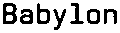

In [16]:
from IPython.display import Image
Image(filename='../catalog-testset/SD/SD00200000003/010001.bin.png') 